In [1]:
# this is just to know how much time will it take to run this entire ipython notebook 
from datetime import datetime
# globalstart = datetime.now()
import pandas as pd
import numpy as np
import matplotlib


import matplotlib.pyplot as plt


import seaborn as sns
sns.set_style('whitegrid')
import os
from scipy import sparse
from scipy.sparse import csr_matrix

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import random

<h1>  Loading Netflix Datast__ for all methods </h1>

In [3]:
start = datetime.now()
if not os.path.isfile('data_submit1.csv'):

    data = open('data_submit1.csv', mode='w')
    
    row = list()
    files=['C:/Users/rohit khoja/Desktop/Sem 7/Data ana/project/archive (2)/combined_data_1.txt','C:/Users/rohit khoja/Desktop/Sem 7/Data ana/project/archive (2)/combined_data_2.txt', 
           'C:/Users/rohit khoja/Desktop/Sem 7/Data ana/project/archive (2)/combined_data_3.txt', 'C:/Users/rohit khoja/Desktop/Sem 7/Data ana/project/archive (2)/combined_data_4.txt']
    for file in files:
        print("Reading ratings from {}...".format(file))
        with open(file) as f:
            for line in f: 
                del row[:]
                line = line.strip()
                if line.endswith(':'):
                    
                    movie_id = line.replace(':', '')
                else:
                    row = [x for x in line.split(',')]
                    row.insert(0, movie_id)
                    data.write(','.join(row))
                    data.write('\n')
        print("Done.\n")
    data.close()
print('Time taken :', datetime.now() - start)

Reading ratings from C:/Users/rohit khoja/Desktop/Sem 7/Data ana/project/archive (2)/combined_data_1.txt...
Done.

Reading ratings from C:/Users/rohit khoja/Desktop/Sem 7/Data ana/project/archive (2)/combined_data_2.txt...
Done.

Reading ratings from C:/Users/rohit khoja/Desktop/Sem 7/Data ana/project/archive (2)/combined_data_3.txt...
Done.

Reading ratings from C:/Users/rohit khoja/Desktop/Sem 7/Data ana/project/archive (2)/combined_data_4.txt...
Done.

Time taken : 0:05:17.173776


In [2]:
print("creating the data_submitframe from data_submit1.csv file..")
df = pd.read_csv('data_submit1.csv', sep=',', 
                       names=['movie', 'user','rating','date'])
df.date = pd.to_datetime(df.date)
print('Done.\n')

print('Sorting the data_submitframe by date..')
df.sort_values(by='date', inplace=True)
print('Done..')

creating the data_submitframe from data_submit1.csv file..
Done.

Sorting the data_submitframe by date..
Done..


In [4]:
df.head()

,movie,user,rating,date
56431994,10341,510180,4,1999-11-11
9056171,1798,510180,5,1999-11-11
58698779,10774,510180,3,1999-11-11
48101611,8651,510180,2,1999-11-11
81893208,14660,510180,2,1999-11-11


Text(0, 0.5, 'ratings')

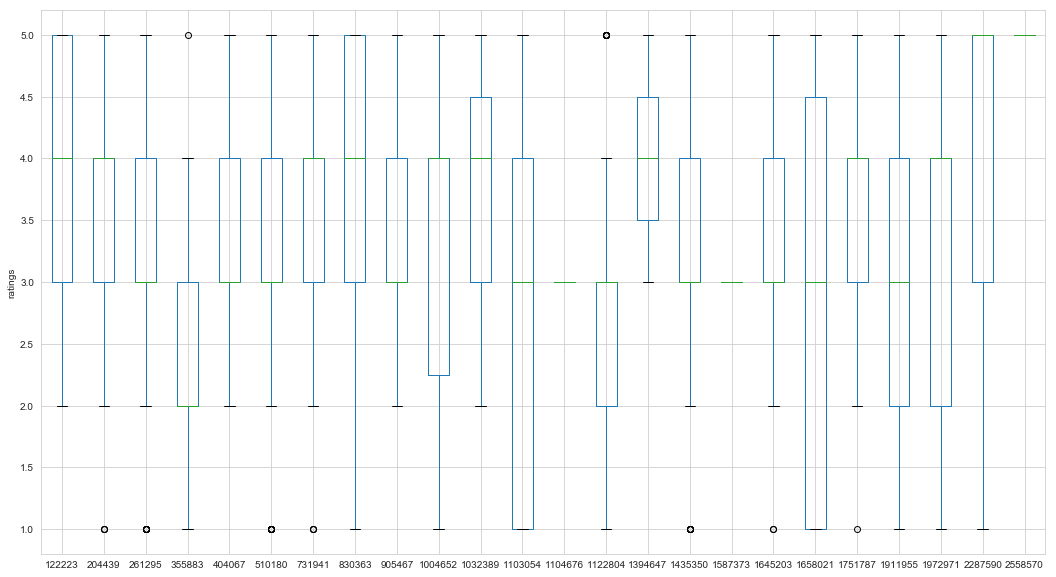

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 10))
df.head(1000).pivot_table(index = 'movie', columns ='user', values = 'rating').plot(ax=ax,kind='box')
plt.ylabel('ratings')

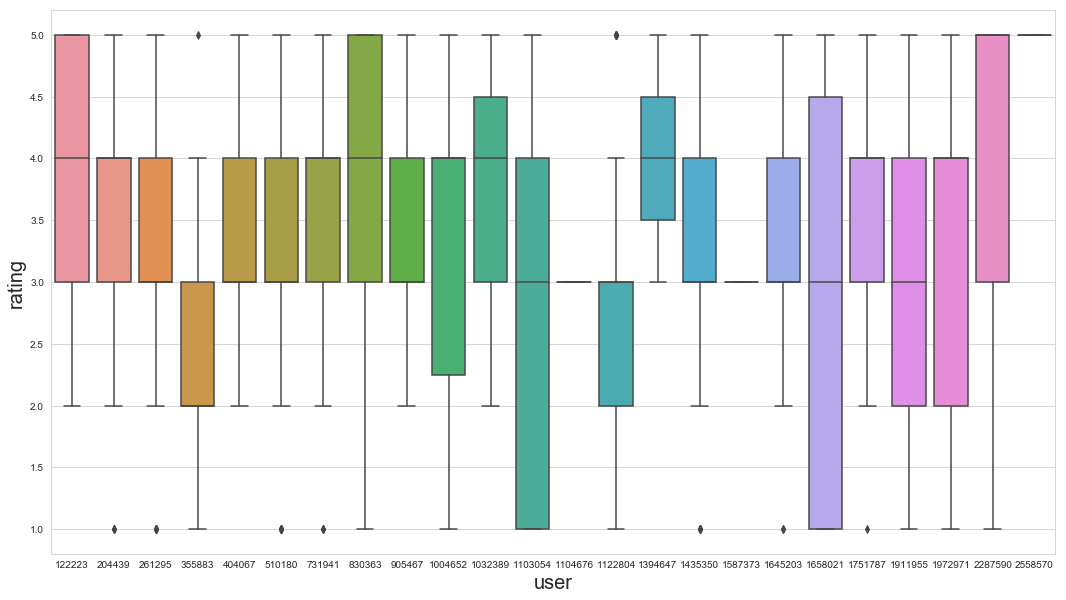

In [29]:
fig, ax = plt.subplots(figsize=(18, 10))
plt.xlabel('user', fontsize=20)
plt.ylabel('rating', fontsize=20)

sns.boxplot(y='rating', x='user', data=df.head(1000),ax=ax)



In [ ]:
df.sort_values(["movie"], axis=0, 
                 ascending=True, inplace=True) 

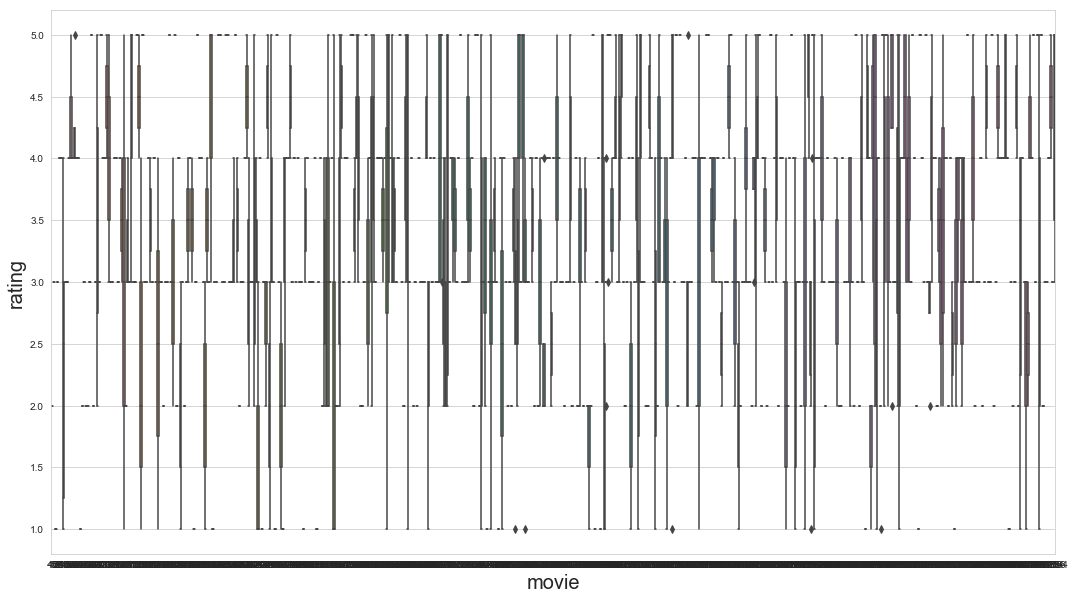

In [30]:
fig, ax = plt.subplots(figsize=(18, 10))

plt.xlabel('user', fontsize=20)
plt.ylabel('rating', fontsize=20)

sns.boxplot(y='rating', x='movie', data=df.head(1000),ax=ax)


In [ ]:
plt.xlabel('user', fontsize=20)
plt.ylabel('rating', fontsize=20)
plt.suptitle('User detail', fontsize=30)

In [7]:
df.describe()['user']

count    1.004805e+08
mean     1.322489e+06
std      7.645368e+05
min      6.000000e+00
25%      6.611980e+05
50%      1.319012e+06
75%      1.984455e+06
max      2.649429e+06
Name: user, dtype: float64

In [8]:
df.describe()['movie']

count    1.004805e+08
mean     9.070915e+03
std      5.131891e+03
min      1.000000e+00
25%      4.677000e+03
50%      9.051000e+03
75%      1.363500e+04
max      1.777000e+04
Name: movie, dtype: float64

__Train & Test__

In [11]:
if not os.path.isfile('train_submit.csv'):
    
    df.iloc[:int(df.shape[0]*0.80)].to_csv("train_submit.csv", index=False)

if not os.path.isfile('test_submit.csv'):
   
    df.iloc[int(df.shape[0]*0.80):].to_csv("test_submit.csv", index=False)

train_submit_df = pd.read_csv("train_submit.csv", parse_dates=['date'])
test_submit_df = pd.read_csv("test_submit.csv")

In [12]:

print("Training data ")
print("-"*50)
print("\nTotal no of ratings :",train_submit_df.shape[0])
print("Total No of Users   :", len(np.unique(train_submit_df.user)))
print("Total No of movies  :", len(np.unique(train_submit_df.movie)))


print("="*123)
print("="*123)
print("\nTest data ")
print("-"*50)
print("\nTotal no of ratings :",test_submit_df.shape[0])
print("Total No of Users   :", len(np.unique(test_submit_df.user)))
print("Total No of movies  :", len(np.unique(test_submit_df.movie)))


Training data 
--------------------------------------------------

Total no of ratings : 80384405
Total No of Users   : 405041
Total No of movies  : 17424

Test data 
--------------------------------------------------

Total no of ratings : 20096102
Total No of Users   : 349312
Total No of movies  : 17757


<h3>  Creating sparse matrix from data frame </h3>



In [3]:
start = datetime.now()

    
train_sparse_submit_matrix = sparse.csr_matrix((train_submit_df.rating.values, (train_submit_df.user.values,
                                               train_submit_df.movie.values)),)
   

It is present in your pwd, getting it from disk....
DONE..
0:00:01.544372


In [7]:
start = datetime.now()

test_sparse_submit_matrix = sparse.csr_matrix((test_submit_df.rating.values, (test_submit_df.user.values,
                                               test_submit_df.movie.values)))


It is present in your pwd, getting it from disk....
DONE..
0:00:01.654247


In [ ]:
test_sparse_submit_matrix.head()

<h3> Finding Global average of all movie ratings, Average rating per user, and Average rating per movie</h3>

In [16]:


def get_average_ratings(sparse_matrix, of_users):
    ax = 1 if of_users else 0 # 1 - User axes,0 - Movie axes
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    is_rated = sparse_matrix!=0
    no_of_ratings = is_rated.sum(axis=ax).A1
    u,m = sparse_matrix.shape
    average_ratings = { i : sum_of_ratings[i]/no_of_ratings[i]
                                 for i in range(u if of_users else m) 
                                    if no_of_ratings[i] !=0}

   
    return average_ratings

In [22]:
train_averages = dict()

train_global_average = train_sparse_submit_matrix.sum()/train_sparse_submit_matrix.count_nonzero()
train_averages['global'] = train_global_average
train_averages

{'global': 3.582890686321557}

In [23]:
train_averages['user'] = get_average_ratings(train_sparse_submit_matrix, of_users=True)
print('\nAverage rating of user 10 :',train_averages['user'][10])




Average rating of user 10 : 3.3781094527363185


In [24]:
train_averages['movie'] =  get_average_ratings(train_sparse_submit_matrix, of_users=False)
print('\n AVerage rating of movie 15 :',train_averages['movie'][15])
print('\n AVerage rating of movie 125 :',train_averages['movie'][125])
print('\n AVerage rating of movie 225 :',train_averages['movie'][225])
print('\n AVerage rating of movie 325 :',train_averages['movie'][325])


 AVerage rating of movie 15 : 3.3038461538461537

 AVerage rating of movie 125 : 3.3718944099378882

 AVerage rating of movie 225 : 2.729117298578199

 AVerage rating of movie 325 : 4.328431372549019


In [28]:


movie_titles = pd.read_csv("C:/Users/rohit khoja/Desktop/Sem 7/Data ana/project/archive (2)/movie_titles.csv", sep=',', header = None,
                           names=['movie_id', 'year_of_release', 'title'], verbose=True,
                      index_col = 'movie_id', encoding = "ISO-8859-1")

movie_titles.head

Tokenization took: 17.21 ms
Type conversion took: 75.52 ms
Parser memory cleanup took: 0.00 ms


<bound method NDFrame.head of           year_of_release                                              title
movie_id                                                                    
1                  2003.0                                    Dinosaur Planet
2                  2004.0                         Isle of Man TT 2004 Review
3                  1997.0                                          Character
4                  1994.0                       Paula Abdul's Get Up & Dance
5                  2004.0                           The Rise and Fall of ECW
6                  1997.0                                               Sick
7                  1992.0                                              8 Man
8                  2004.0                         What the #$*! Do We Know!?
9                  1991.0                           Class of Nuke 'Em High 2
10                 2001.0                                            Fighter
11                 1999.0                     

In [32]:
movie_ids

array([    1,     2,     3, ..., 17768, 17769, 17770], dtype=int32)

In [5]:
def get_sample_sparse_matrix(sparse_matrix, no_users, no_movies, path, verbose = True):
    

    
    row_ind, col_ind, ratings = sparse.find(sparse_matrix)
    users = np.unique(row_ind)
    movies = np.unique(col_ind)


    
    np.random.seed(15)
    sample_users = np.random.choice(users, no_users, replace=False)
    sample_movies = np.random.choice(movies, no_movies, replace=False)
  
    mask = np.logical_and( np.isin(row_ind, sample_users),
                      np.isin(col_ind, sample_movies) )
    
    sample_sparse_matrix = sparse.csr_matrix((ratings[mask], (row_ind[mask], col_ind[mask])),
                                             shape=(max(sample_users)+1, max(sample_movies)+1))

    
    sparse.save_npz(path, sample_sparse_matrix)
 
    
    return sample_sparse_matrix

In [12]:
start = datetime.now()
path = "train_assignment_submit.npz"


sample_train_sparse_matrix = get_sample_sparse_matrix(train_sparse_submit_matrix, no_users = 15000, no_movies = 1000,
                                             path = path)

print(datetime.now() - start)

It is present in your pwd, getting it from disk....
DONE..
0:00:00.868892


In [8]:
start = datetime.now()

path = "test_assignment_submit.npz"

sample_test_sparse_matrix = get_sample_sparse_matrix(test_sparse_submit_matrix, no_users= 5000, no_movies=500,
                                                 path = "test_assignment.npz")
print(datetime.now() - start)

Original Matrix : (users, movies) -- (349312 17757)
Original Matrix : Ratings -- 20096102

Sampled Matrix : (users, movies) -- (5000 500)
Sampled Matrix : Ratings -- 7333
Saving it into disk for furthur usage..
Done..

0:00:15.854420


In [14]:

sample_train_averages = dict()
global_average = sample_train_sparse_matrix.sum()/sample_train_sparse_matrix.count_nonzero()
sample_train_averages['global'] = global_average
global_average


3.575733966255611

In [17]:
sample_train_averages['movie'] =  get_average_ratings(sample_train_sparse_matrix, of_users=False)
print('\n AVerage rating of movie 15153 :',sample_train_averages['movie'][15153])


 AVerage rating of movie 15153 : 2.6184210526315788


In [18]:
sample_train_averages['user'] = get_average_ratings(sample_train_sparse_matrix, of_users=True)
print('\nAverage rating of user 1515220 :',sample_train_averages['user'][1515220])


Average rating of user 1515220 : 3.9655172413793105


In [19]:

sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(sample_train_sparse_matrix)

<h1> Featurizing data for Linear regression problem </h1>

In [ ]:
start = datetime.now()
if os.path.isfile('sampled_train_assignment_submit.csv'):
    print("File already exists you don't have to prepare again..." )
else:
    print('preparing {} tuples for the dataset..\n'.format(len(sample_train_ratings)))
    with open('sampled_train_assignment.csv', mode='w') as reg_data_file:
        count = 0
        
            row = list()
            row.append(user)
            row.append(movie)
            
            row.append(sample_train_averages['global']) # first feature
            # Avg_user rating
            row.append(sample_train_averages['user'][user])
            # Avg_movie rating
            row.append(sample_train_averages['movie'][movie])

            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%10000 == 0:
                # print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))


print(datetime.now() - start)

In [10]:

sample_test_users, sample_test_movies, sample_test_ratings = sparse.find(sample_test_sparse_matrix)

In [20]:
start = datetime.now()

if os.path.isfile('sampled_test_assignment_submit.csv'):
    print("It is already created...")
else:

    print('preparing {} tuples for the dataset..\n'.format(len(sample_test_ratings)))
    with open('sampled_test_assignment.csv', mode='w') as reg_data_file:
        
            row = list()
            # add usser and movie name first
            row.append(user)
            row.append(movie)
            row.append(sample_train_averages['global']) # first feature
            
            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            #print(row)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            #print(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%1000 == 0:
                #print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))
    print("",datetime.now() - start)  

preparing 7333 tuples for the dataset..

Done for 1000 rows----- 0:06:39.480868
Done for 2000 rows----- 0:16:36.617390
Done for 3000 rows----- 0:28:49.041233
Done for 4000 rows----- 0:40:53.799526
Done for 5000 rows----- 0:53:05.723669
Done for 6000 rows----- 1:03:12.980333
Done for 7000 rows----- 1:10:48.385813
 1:13:19.395879
